In [112]:

# Importing Necessary Libraries
import os
import pandas as pd
from IPython.display import Markdown as md

from dotenv import load_dotenv
load_dotenv()

# Constants
DATA_PATH = "data"
TRANSCRIPT_PATH = "data/transcripts"
ANNOTATIONS_PATH = "data/annotations"
AZURE_DEPLOYMENT_GPT = "eddo-gpt4"


# Load transcript data
transcripts_df = pd.read_csv(os.path.join(DATA_PATH, "merged_transcripts.csv"))
transcripts_df.head()    

# Load annotations data
# Load the annotations from the individual csv files
path = os.path.join(DATA_PATH, "annotations.csv")
annotations_df = pd.read_csv(path, ignore index=True)
annotations_df

In [113]:
# filter out annotations that have a brand
brand_annotations = annotations_df[annotations_df["brand"].notna()]


In [114]:
# filter out carolina brand
from operator import contains

# filter out carolina brand
carolina_brand = brand_annotations[annotations_df["brand"].fillna("").str.contains("Carolina" or "carolina")]

# filter out flinn brand
flinn_brand = brand_annotations[annotations_df["brand"].fillna("").str.contains("Flinn" or "flinn")]

# Display an infographic of the annotations
md(f"""
# Brand Annotations
## Total number of annotations: {len(annotations_df)}
## Number of brand mentions: {len(brand_annotations)}
## Carolina was mentioned {len(carolina_brand)} times
## Flinn was mentioned {len(flinn_brand)} times
""")


/tmp/ipykernel_82528/3575814251.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  carolina_brand = brand_annotations[annotations_df["brand"].fillna("").str.contains("Carolina" or "carolina")]
/tmp/ipykernel_82528/3575814251.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flinn_brand = brand_annotations[annotations_df["brand"].fillna("").str.contains("Flinn" or "flinn")]



# Brand Annotations
## Total number of annotations: 962
## Number of brand mentions: 146
## Carolina was mentioned 60 times
## Flinn was mentioned 24 times


In [115]:
# brand list
brand_list = brand_annotations["brand"]
brand_list

# handle synonyms
flinn_synonyms = ["Flinn", "Flinn Scientific", "Flinn Scientific Inc.", "Flinn Scientific, Inc.", "Flynn", "Flynn Scientific", "Flynn Scientific Inc.", "Flynn Scientific"]
carolina_synonyms = ["Carolina", "Carolina Biological", "Carolina Biological Supply", "Carolina Biological Supply Co.", "Carolina Biological Supply Company", "Carolina Biological Supply Company, LLC", "Carolina Biological Supply Company, LLC.", "Carolina Bio"]

# replace synonyms
brand_list = brand_list.replace(flinn_synonyms, "Flinn")
brand_list = brand_list.replace(carolina_synonyms, "Carolina")
# not Unknown or Unavailable
brand_list = brand_list[brand_list != "Unknown"]
brand_list = brand_list[brand_list != "Unspecified"]
brand_list = brand_list[brand_list != "General"]

brand_list = brand_list
brand_list





5         Flinn
6      Carolina
12     Carolina
13       Amazon
14       Amazon
         ...   
942    Carolina
944    Carolina
945    Carolina
949    Carolina
952    Carolina
Name: brand, Length: 141, dtype: object

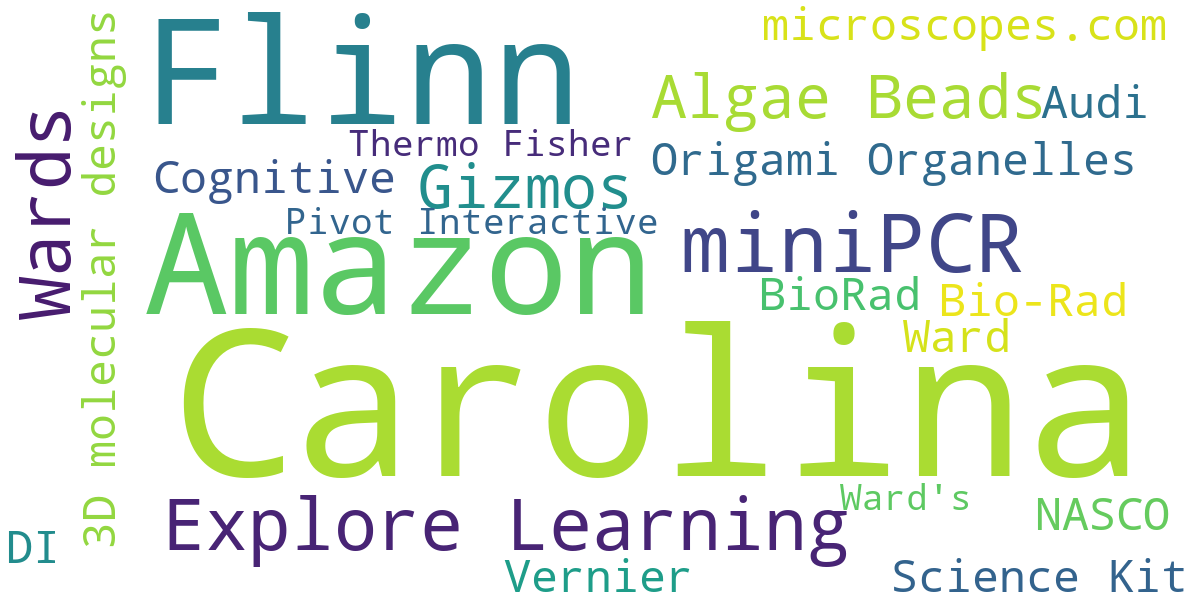

In [116]:
# word cloud

# Import the wordcloud library
from collections.abc import Sized
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Stopwords
from wordcloud import STOPWORDS

# Create a WordCloud object

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', scale=3)

# Generate a word cloud

wordcloud.generate_from_frequencies(frequencies=brand_list.value_counts())

# Visualize the word cloud

wordcloud.to_image()


In [145]:

import array
from ast import List
from typing import List


purchases = annotations_df["identified_purchases"]

# filter out purchases that are not empty
purchases = purchases[purchases.notna()]
# filter out purchases that are not empty lists
purchases = purchases[purchases.count() > 0]
purchases

KeyError: True